<h2 style="color:#000000; border:2px solid #6D7E86; text-align:center; border-radius:8px; background-color:rgb(199,239,0,0.5);text-transform:uppercase;padding:0.7rem">🚀Upvote if you find it useful!</h2>


## Pet Classify Hub


### Importing Essential Packages 📦🔍


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import os
import cv2

### Importing Images 📦📸


In [2]:
folder_path_train = "..\data\dogs-vs-cats\\train"
current_directory = os.getcwd()
full_path_train = os.path.join(current_directory, folder_path_train)
full_path_train = os.path.normpath(full_path_train)
print(full_path_train)

folder_path_test = "..\data\dogs-vs-cats\\test"
current_directory = os.getcwd()
full_path_test = os.path.join(current_directory, folder_path_test)
full_path_test = os.path.normpath(full_path_test)
print(full_path_test)

d:\Machine-learning\Pet-Classify-Hub\data\dogs-vs-cats\train
d:\Machine-learning\Pet-Classify-Hub\data\dogs-vs-cats\test


#### Importing all images


In [3]:
train_images_df = []
train_labels_df = []
# plt.figure(figsize=(16, 9))
for filename in os.listdir(full_path_train):
    if filename.endswith(".jpg"):
        image_path = os.path.join(full_path_train, filename)
        if len(train_images_df) % 100 == 0:
            print(len(train_images_df))
        img = cv2.imread(image_path)
        # plt.subplot(5, 6, len(images) + 1)
        # plt.imshow(img)
        if len(train_images_df) == 1000:
            break
        train_images_df.append(img)
        train_labels_df.append(filename.split(".")[0])
print("Shape of images array:", len(train_images_df))
print("Shape of labels array:", train_labels_df)
# plt.imshow(img)

0
100
200
300
400
500
600
700
800
900
1000
Shape of images array: 1000
Shape of labels array: ['cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'c

#### Imported only 1000 images for train


In [4]:
train_images_df = []
train_labels_df = []

num_dogs = 0
num_cats = 0
target_images = 2000

for filename in os.listdir(full_path_train):
    if filename.endswith(".jpg"):
        image_path = os.path.join(full_path_train, filename)
        img = cv2.imread(image_path)

        label = filename.split(".")[0]
        if label == "cat" and num_cats < target_images / 2:
            train_images_df.append(img)
            train_labels_df.append(label)
            num_cats += 1
        elif label == "dog" and num_dogs < target_images / 2:
            train_images_df.append(img)
            train_labels_df.append(label)
            num_dogs += 1

        # Break if we have enough images
        if num_cats + num_dogs == target_images:
            break

print("Number of cat images:", num_cats)
print("Number of dog images:", num_dogs)
print("Shape of images array:", len(train_images_df))
print("Shape of labels array:", len(train_labels_df))

Number of cat images: 1000
Number of dog images: 1000
Shape of images array: 2000
Shape of labels array: 2000


In [5]:
print(train_labels_df[0:10])
print(train_labels_df[990:])

['cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat']
['cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog

In [6]:
# plt.figure(figsize=(40, 100))
# for i, img in enumerate(train_images):
#     plt.subplot(50, 20, i + 1)
#     plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#     plt.axis('off')

# plt.show()

#### Imported only 250 images for test


In [7]:
predication_images = []
for filename in os.listdir(full_path_test):
    if filename.endswith(".jpg"):
        image_path = os.path.join(full_path_test, filename)
        if len(predication_images) % 100 == 0:
            print(len(predication_images))
        img = cv2.imread(image_path)
        if len(predication_images) == 250:
            break
        predication_images.append(img)
print("Shape of images array:", len(predication_images))

0
100
200
Shape of images array: 250


In [8]:
# plt.figure(figsize=(25, 50))
# for i, img in enumerate(predication_images):
#     plt.subplot(25, 10, i + 1)
#     plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#     plt.axis('off')

# plt.show()

#### sample Submission pattern


In [9]:
sample_submission = pd.read_csv(
    '../data/dogs-vs-cats/sampleSubmission.csv').head(250)
sample_submission

,id,label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
245,246,0
246,247,0
247,248,0
248,249,0


### Building and Training Models 🏗️🤖


In [10]:
train_labels_df = np.array(train_labels_df)
train_labels_df[train_labels_df == 'cat'] = 0
train_labels_df[train_labels_df == 'dog'] = 1
train_labels_df = train_labels_df.astype(np.int32)
print(train_labels_df[0:10])
print(train_labels_df[990:])

[0 0 0 0 0 0 0 0 0 0]
[0 0 0 ... 1 1 1]


In [11]:
train_images_df = [cv2.resize(img, (256, 256)) for img in train_images_df]
predication_images = [cv2.resize(img, (256, 256))
                      for img in predication_images]

In [12]:
train_images_df = np.array(train_images_df)
train_images_df = train_images_df / 255.0
predication_images = np.array(predication_images)
predication_images = predication_images / 255.0

In [13]:
train_images_df.shape

(2000, 256, 256, 3)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(
    train_images_df, train_labels_df, test_size=0.2, random_state=42)

In [15]:
x_test.shape

(400, 256, 256, 3)

In [16]:
x_train.shape

(1600, 256, 256, 3)

#### Convolutional Neural Network (CNN) 🌐🔍


In [29]:
cnn_model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3,
                        input_shape=(256, 256, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [30]:
cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

cnn_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 128)     

In [31]:
cnn_model.fit(x_train, y_train, epochs=5,
              batch_size=16, verbose=1, validation_split=0.15)

Epoch 1/5
85/85 [==============================] - 78s 879ms/step - loss: 0.7292 - accuracy: 0.5051 - val_loss: 0.6810 - val_accuracy: 0.5458
Epoch 2/5
85/85 [==============================] - 84s 985ms/step - loss: 0.6898 - accuracy: 0.5154 - val_loss: 0.6846 - val_accuracy: 0.5292
Epoch 3/5
85/85 [==============================] - 108s 1s/step - loss: 0.6891 - accuracy: 0.5412 - val_loss: 0.6627 - val_accuracy: 0.5792
Epoch 4/5
85/85 [==============================] - 101s 1s/step - loss: 0.6562 - accuracy: 0.6279 - val_loss: 0.6331 - val_accuracy: 0.6667
Epoch 5/5
85/85 [==============================] - 79s 934ms/step - loss: 0.5673 - accuracy: 0.7110 - val_loss: 0.6037 - val_accuracy: 0.6750


In [32]:
def evalute_and_cm(model, x_test, y_test):
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
    print("Accuracy on test set is: {}".format(test_accuracy))

    predictions = model.predict(x_test)
    predictions = np.round(predictions).astype(int).reshape(x_test.shape[0])

    cm = confusion_matrix(y_test, predictions)

    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()

13/13 [==============================] - 5s 342ms/step - loss: 0.6300 - accuracy: 0.6800
Accuracy on test set is: 0.6800000071525574
13/13 [==============================] - 4s 324ms/step


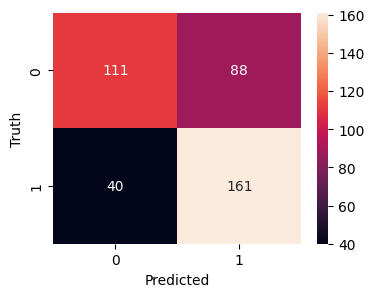

In [33]:
evalute_and_cm(cnn_model, x_test, y_test)

#### Making Predictions 🚀🔮


In [34]:
y_predicted_x_test_df = cnn_model.predict(predication_images)
y_predicted_x_test_df = np.round(y_predicted_x_test_df).astype(int).reshape(predication_images.shape[0])

8/8 [==============================] - 3s 386ms/step


In [35]:
sample_submission['label'] = y_predicted_x_test_df

sample_submission.head(10)

sample_submission.to_csv('submission.csv', index=False)

print("Visualizing Predictions 📊📈")

Visualizing Predictions 📊📈


#### Implementing Dropout for Regularization 🕳️🔄


In [17]:
cnn_model_dropout = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3,
                        input_shape=(256, 256, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

cnn_model_dropout.compile(optimizer='adam',
                          loss='binary_crossentropy',
                          metrics=['accuracy'])

In [18]:
cnn_model_dropout.fit(x_train, y_train, epochs=5,
              batch_size=16, verbose=1, validation_split=0.15)

Epoch 1/5
85/85 [==============================] - 100s 1s/step - loss: 0.8781 - accuracy: 0.4676 - val_loss: 0.6932 - val_accuracy: 0.4750
Epoch 2/5
85/85 [==============================] - 78s 913ms/step - loss: 0.6935 - accuracy: 0.5044 - val_loss: 0.6929 - val_accuracy: 0.4875
Epoch 3/5
85/85 [==============================] - 80s 937ms/step - loss: 0.6902 - accuracy: 0.5500 - val_loss: 0.6868 - val_accuracy: 0.5792
Epoch 4/5
85/85 [==============================] - 80s 946ms/step - loss: 0.6806 - accuracy: 0.5801 - val_loss: 0.6918 - val_accuracy: 0.6000
Epoch 5/5
85/85 [==============================] - 139s 2s/step - loss: 0.6450 - accuracy: 0.6456 - val_loss: 0.6956 - val_accuracy: 0.5458


13/13 [==============================] - 5s 321ms/step - loss: 0.6798 - accuracy: 0.5900
Accuracy on test set is: 0.5899999737739563
13/13 [==============================] - 5s 366ms/step


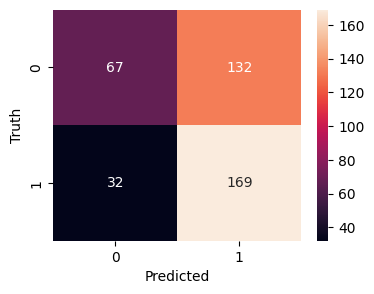

In [20]:
evalute_and_cm(cnn_model_dropout, x_test, y_test)

#### Implementing batch for Regularization 🕳️🔄


In [21]:
cnn_model_batch = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3,
                        input_shape=(256, 256, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

cnn_model_batch.compile(optimizer='adam',
                        loss='binary_crossentropy',
                        metrics=['accuracy'])

In [22]:
cnn_model_batch.fit(x_train, y_train, epochs=5,
              batch_size=16, verbose=1, validation_split=0.15)

Epoch 1/5
85/85 [==============================] - 147s 2s/step - loss: 4.2732 - accuracy: 0.5382 - val_loss: 5.0633 - val_accuracy: 0.4708
Epoch 2/5
85/85 [==============================] - 118s 1s/step - loss: 0.6611 - accuracy: 0.5750 - val_loss: 1.9829 - val_accuracy: 0.5250
Epoch 3/5
85/85 [==============================] - 436s 5s/step - loss: 0.6457 - accuracy: 0.5919 - val_loss: 0.9628 - val_accuracy: 0.5208
Epoch 4/5
85/85 [==============================] - 122s 1s/step - loss: 0.6432 - accuracy: 0.6243 - val_loss: 2.8526 - val_accuracy: 0.5125
Epoch 5/5
85/85 [==============================] - 119s 1s/step - loss: 0.6030 - accuracy: 0.6500 - val_loss: 1.6154 - val_accuracy: 0.5125


13/13 [==============================] - 7s 522ms/step - loss: 1.8139 - accuracy: 0.5275
Accuracy on test set is: 0.5274999737739563
13/13 [==============================] - 7s 498ms/step


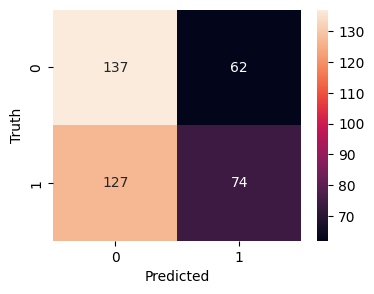

In [23]:
evalute_and_cm(cnn_model_batch, x_test, y_test)

#### Data Augmentation for Improved Generalization 🔄📸


In [28]:
print("Data Augmentation for Improved Generalization 🔄📸")

Data Augmentation for Improved Generalization 🔄📸


### Conclusion 🎉🏁


#### **Score: 0.68**
